# `cloudwatcher` Python API usage

The purpose of this page is to provide a quick overview of the `cloudwatcher` Python API. The package consists of two user-facing classes:

- `MetricWatcher`: This class is used to interact with AWS CloudWatch metrics.
- `LogWatcher`: This class is used to interact with AWS CloudWatch logs.

Both of these classes inherit from the `CloudWatcher` class.

## `MetricWatcher`: convenient interface to AWS CloudWatch metrics

`MetricWatcher` can be used to interact with AWS CloudWatch metrics. 

### `MetricWatcher` initialization

As described in the Login credentials section, the AWS credentials can be sourced from environment variables: `AWS_ACCESS_KEY_ID`, `AWS_SECRET_ACCESS_KEY`, `AWS_SESSION_TOKEN`.
Alternatively, you can pass the values as arguments to the `MetricWatcher` constructor.

In [2]:
from cloudwatcher import MetricWatcher
from cloudwatcher.const import DEFAULT_QUERY_KWARGS

instance_id = "i-048529e65b26aaded"
mw = MetricWatcher(
    namespace="michal-NepheleNamespace",
    metric_name="mem_used",
    metric_id="mem_used",
    metric_unit="Bytes",
    ec2_instance_id=instance_id,
)

### `MetricWatcher` EC2 query period selection

In order to specify the EC2 instace query settings (period, granularity, etc.), the user would need to provide multiple parameters. To make it easier, there are a few sensible presets that can be used to select the query settings, which are passed to `query_ec2_metrics` method. These presets are defined to query the data reported by the EC2 instance within the last day, hour or minute.

In [3]:
from cloudwatcher.const import QUERY_KWARGS_PRESETS

list(QUERY_KWARGS_PRESETS.keys())

['day', 'hour', 'minute']

The presets can be used by passing the `query_preset` argument to the functions presented below. Alternatively, users can pass `query_kwargs` argument, which overrides the preset values.

### Logging methods

There is a method that can be used to log the metric to the screen. The EC2 instance is automatically queried if the query response is not provided.

In [4]:
mw.log_metric(query_preset="day")

┏━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Time (UTC) ┃ Value      ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│  12:17:40  │ 641.938 MB │
│  12:17:30  │ 641.938 MB │
│  12:17:20  │ 641.906 MB │
│  12:17:10  │ 641.945 MB │
│  12:17:00  │ 641.438 MB │
│  12:16:50  │ 640.918 MB │
│  12:16:40  │ 640.918 MB │
│  12:16:30  │ 640.887 MB │
│  12:16:20  │ 641.262 MB │
│  12:16:10  │ 641.441 MB │
│  12:16:00  │ 641.441 MB │
│  12:15:50  │ 767.469 MB │
│  12:15:40  │ 2.078 GB   │
│  12:15:30  │ 2.079 GB   │
│  12:15:20  │ 2.304 GB   │
│  12:15:10  │ 2.064 GB   │
│  12:15:00  │ 7.922 GB   │
│  12:14:50  │ 7.789 GB   │
│  12:14:40  │ 2.307 GB   │
│  12:14:30  │ 2.128 GB   │
│  12:14:20  │ 2.122 GB   │
│  12:14:10  │ 2.095 GB   │
│  12:14:00  │ 1.995 GB   │
│  12:13:50  │ 1.886 GB   │
│  12:13:40  │ 1.926 GB   │
│  12:13:30  │ 1.730 GB   │
│  12:13:20  │ 1.730 GB   │
│  12:13:10  │ 1.555 GB   │
│  12:13:00  │ 1.492 GB   │
│  12:12:50  │ 1.462 GB   │
│  12:12:40  │ 1.540 GB   │
│  12:12:30  │ 1.313 GB   │
│  12:12:20  │ 967.289 MB │
│  12:12:10  │ 832.797 MB │
│  12:12:00  │ 1.134 GB   │
│  12:11:50  │ 1.031 GB   │
│  12:11:40  │ 958.074 MB │
│  12:11:30  │ 860.031 MB │
│  12:11:20  │ 799.848 MB │
│  12:11:10  │ 740.176 MB │
│  12:11:00  │ 679.586 MB │
│  12:10:50  │ 698.457 MB │
│  12:10:40  │ 689.941 MB │
│  12:10:30  │ 624.820 MB │
└────────────┴────────────┘

### File saving methods

There are number of methods that can be used to save the metric data to a file. Again, the EC2 instance is automatically queried if the query response is not provided.


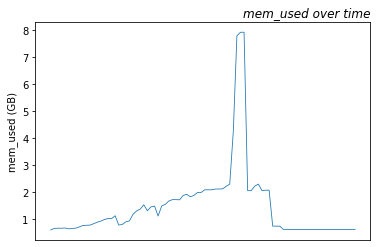

In [5]:
mw.save_metric_plot(file_path=f"/tmp/{instance_id}_plot.png")
mw.save_metric_csv(file_path=f"/tmp/{instance_id}_metric.csv")
mw.save_metric_json(file_path=f"/tmp/{instance_id}_metric.json")
mw.save_response_json(file_path=f"/tmp/{instance_id}_response.json")

### Maunal EC2 querying

For users that require more control over the EC2 instance query settings, the `query_ec2_metrics` method can be used to manually query the EC2 instance. For instance it allows to fine tune the query period settings.

In [6]:
FINE_TUNED_SETTINGS = {
    "days": 1,
    "hours": 0,
    "minutes": 0,
    "stat": "Maximum",
    "period": 10,
}
response = mw.query_ec2_metrics(**FINE_TUNED_SETTINGS)

response["ResponseMetadata"]

{'RequestId': '20f5d4a7-6baa-4da7-ab28-b77ca796b3bb',
 'HTTPStatusCode': 200,
 'HTTPHeaders': {'x-amzn-requestid': '20f5d4a7-6baa-4da7-ab28-b77ca796b3bb',
  'content-type': 'text/xml',
  'content-length': '8116',
  'date': 'Thu, 28 Apr 2022 14:06:33 GMT'},
 'RetryAttempts': 0}

### `TimedMetric` dataclass

Internally, the package uses `TimedMetric` dataclass to store the metric data. This dataclass is used to store the metric data and provide a convenient interface to access the data. It can be also used to interact with the metric data by the user.

In [8]:
response = mw.query_ec2_metrics(**FINE_TUNED_SETTINGS)
timed_metric = mw.timed_metric_factory(response)[0]
print(timed_metric.__class__)
timed_metric.values[1:10]

<class 'cloudwatcher.metric_handlers.TimedMetric'>


[673120256.0,
 673087488.0,
 673087488.0,
 673087488.0,
 673120256.0,
 673128448.0,
 672595968.0,
 672595968.0,
 672051200.0]

## `LogWatcher`: convenient interface to AWS CloudWatch logs

`LogWatcher` can be used to interact with AWS CloudWatch logs.

_Coming soon..._